In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import glob

In [36]:
def plot_grayscale_image(image,title="Image"):
    plt.imshow(image,'gray')
    plt.title(title)
    plt.show()

In [37]:
def plot_color_image(image,title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.show()

### Q1. Search the web for Colour Halftoning algorithms. Select one of them and write a detailed report on it OR implement the selected algorithm and show results on the test images.

Implementing Random dot color dithering

In [41]:
images = [cv.imread(file) for file in glob.glob("Test_data/*.ppm")]

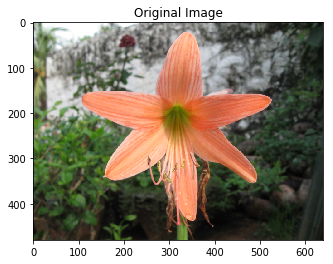

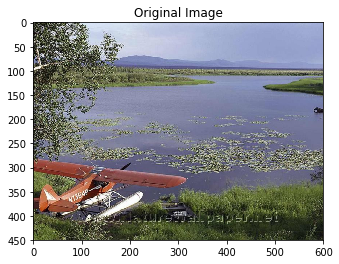

In [42]:
for image in images:
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    height = image.shape[0]
    width = image.shape[1]
    plot_color_image(image, "Original Image")

### Q2. Try coming up with your own error diffusion coefficients and implement the standard error-diffusion algorithm. Compare the performance of your coefficients against Floyd-Steinberg's on this image. Discuss the patterns visible in yours and in Floyd-Steinberg's at the various gray levels.

Floyd Steinberg's Algorithm

In [12]:
def error_diffusion_algo(image, indexes, num_of_indexes, coeffs, result_image):
    new_image = image.copy()
    for i in range(1,new_image.shape[0]-2):
        for j in range(1,new_image.shape[1]-2):
            error = 0
            if new_image[i][j] < 128 : # threshold for binarisation - 128
                error = new_image[i][j]
                new_image[i][j] = 0                
            else:
                error = new_image[i][j] - 255
                new_image[i][j] = 255
            for k in range(num_of_indexes):
                new_image[i+indexes[k][0]][j+indexes[k][1]] = np.clip(
                                                                (new_image[i+indexes[k][0]][j+indexes[k][1]]\
                                                                + coeffs[k] * error), 0, 255)    
#     new_image = np.uint8(new_image)
    cv.imwrite(result_image, new_image)
    return new_image

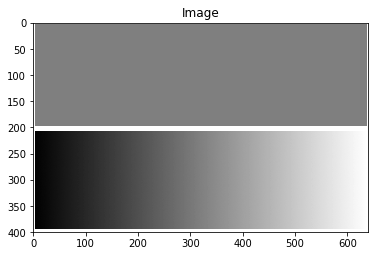

(400, 640)


In [19]:
image = cv.imread('Test_data/ed-eg.png',0)

floyd_steinberg_indexes = [[0,1], [1,1], [1,0], [1,-1]]
floyd_steinberg_coeffs = [7 / 16, 1 / 16, 5 / 16, 3 / 16]
fd_num_of_indexes = 4
error_diffusion_algo(image, floyd_steinberg_indexes, fd_num_of_indexes, floyd_steinberg_coeffs, "Results/FloydSteinbergDiffused.png")

my_diffusion_indexes = [[0,1], [1,1], [1,0],[0,2], [2,2], [2,0]]
my_diffusion_coeffs = [5/26, 3/26, 5/26, 1/26, 1/26, 1/26]
my_num_of_indexes = 6
my_diffused_image = error_diffusion_algo(image, my_diffusion_indexes, my_num_of_indexes, my_diffusion_coeffs, "Results/MyDiffused.png")

### Q3. 
### (a).Implement an algorithm to simulate the grayscale output from a colour filter array. The function prototype is image colour_filter (image, filter).That is, it takes an input colour image and a colour filter as parameters and returns a grayscale image. 
### (b). Implement a demosaicking algorithm with the prototype image demosaic (image, filter).The input image is a grayscale image output by the colour_filter algorithm and the corresponding filter array; the output is a colour image.


a. Apply color filter array on color image to get grayscale image.

In [107]:
def color_filter_2grayscale(image, color_filter, result_image):
    mask_arr = [[0,0], [0,1], [1,0], [1,1]]
    new_image = np.zeros((image.shape[0],image.shape[1]))
    # pass 2x2 filter over the image, for each filter component value, 
    # retain that component value in pixel
    for i in range(0, image.shape[0]-2, 2):
        for j in range(0, image.shape[1]-2, 2):
            for k in range(0, 4):
                new_image[i+mask_arr[k][0]][j+mask_arr[k][1]] = image[i+k][j+k][color_filter[k]]
    cv.imwrite(result_image, new_image)

In [109]:
color_filter1 = [1, 2, 0, 1] # Bayer's mask which Canon uses
color_filter2 = [2, 1, 1, 0] # Bayer's mask which others use
'''
[G,B]
[R,G]
'''
image = cv.imread('Test_data/orange-flower.ppm')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
color_filter_2grayscale(image, color_filter2,'Results/filter2_orange_flower_to_grayscale.jpg')

image = cv.imread('Test_data/fall-colours.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
color_filter_2grayscale(image, color_filter2,'Results/filter2_fall_colors_to_grayscale.jpg')

image = cv.imread('Test_data/waterplane.ppm')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
color_filter_2grayscale(image, color_filter2,'Results/filter2_waterplane_to_grayscale.jpg')